In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [ ]:
# This is a simple calculator agent that performs basic arithmetic operations.
class AgentState(TypedDict):
    num1: int
    operation: str
    num2: int
    result: int

In [ ]:
# Define the state graph for the calculator agent
def adder(state: AgentState) -> AgentState:
    """Perform addition."""
    state['result'] = state['num1'] + state['num2']
    return state
def subtractor(state: AgentState) -> AgentState:
    """Perform subtraction."""
    state['result'] = state['num1'] - state['num2']
    return state

In [ ]:
# Define the decision node
def decide_next_node(state: AgentState) -> AgentState:
    """Decide which operation to perform next based on the operation."""
    if state['operation'] == '+':
        return 'add_operation'
    elif state['operation'] == '-':
        return 'sub_operation'
    else:
        raise ValueError("Unknown operation")

In [ ]:
# Create the state graph
graph = StateGraph(AgentState)

# Define the nodes and edges of the graph
graph.add_node("add_node", adder)
graph.add_node("sub_node", subtractor)
graph.add_node("decide_node", lambda state:state) # No operation, just a pass-through

graph.add_edge(START, "decide_node")
graph.add_conditional_edges(
    "decide_node",
    decide_next_node,
    {
        'add_operation': "add_node",
        'sub_operation': "sub_node"
    }
    
)
graph.add_edge("add_node", END)
graph.add_edge("sub_node", END)

# Compile the graph to create the agent
app = graph.compile()


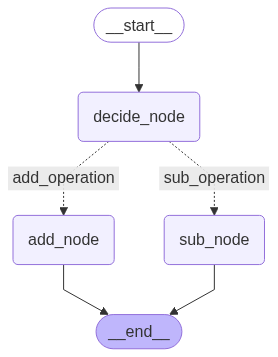

In [ ]:
# Display the graph in Mermaid format
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
# Example usage of the calculator agent with addition
stage_1 = AgentState(num1=10, operation='+', num2=5)
print(app.invoke(stage_1))

{'num1': 10, 'operation': '+', 'num2': 5, 'result': 15}


In [ ]:
# Example usage of the calculator agent with subtraction
stage_2 = AgentState(num1=10, operation='-', num2=5)
print(app.invoke(stage_2))

{'num1': 10, 'operation': '-', 'num2': 5, 'result': 5}
